### **IMPORT NECESSARY LIBRARIES**

In [612]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.utils.class_weight import compute_class_weight
from catboost import CatBoostClassifier

### **LOAD DATA**


In [613]:
# loading the datasets
train_path = r'/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv'
test_path = r'/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv'
submission_path = r'/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# checking the shape of data
print('Training data shape:', train_df.shape)
print('Test data shape:', test_df.shape)

Training data shape: (39211, 16)
Test data shape: (10000, 15)


### **EXPLORATORY DATA ANALYSIS (EDA)**


In [614]:
# checking sample of training data
train_df.head(5)

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


In [615]:
# checking sample of testing data
test_df.head(5)

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,2009-11-21,36,management,single,tertiary,no,7,no,no,NaN,20,1,-1,0,NaN
1,2010-02-04,30,unemployed,married,tertiary,no,1067,no,no,cellular,78,2,-1,0,NaN
2,2010-07-28,32,blue-collar,single,secondary,no,82,yes,no,cellular,86,4,-1,0,NaN
3,2010-06-09,38,admin.,married,primary,no,1487,no,no,NaN,332,2,-1,0,NaN
4,2008-03-02,59,management,married,tertiary,no,315,no,no,cellular,591,1,176,2,failure


In [616]:
# checking information about training dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

In [617]:
# checking information about testing dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  10000 non-null  object
 1   age                10000 non-null  int64 
 2   job                9941 non-null   object
 3   marital            10000 non-null  object
 4   education          9610 non-null   object
 5   default            10000 non-null  object
 6   balance            10000 non-null  int64 
 7   housing            10000 non-null  object
 8   loan               10000 non-null  object
 9   contact            7316 non-null   object
 10  duration           10000 non-null  int64 
 11  campaign           10000 non-null  int64 
 12  pdays              10000 non-null  int64 
 13  previous           10000 non-null  int64 
 14  poutcome           2492 non-null   object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB


In [618]:
# checking null values in the training dataset
train_df.isnull().sum()

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

In [619]:
# checking null values in the testing dataset
test_df.isnull().sum()

last contact date       0
age                     0
job                    59
marital                 0
education             390
default                 0
balance                 0
housing                 0
loan                    0
contact              2684
duration                0
campaign                0
pdays                   0
previous                0
poutcome             7508
dtype: int64

In [620]:
# descriptive statistics for the training dataset
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,39211.0,42.120247,12.709352,18.0,33.0,40.0,50.0,95.0
balance,39211.0,5441.781719,16365.292065,-8019.0,98.0,549.0,2030.0,102127.0
duration,39211.0,439.062789,769.096291,0.0,109.0,197.0,380.0,4918.0
campaign,39211.0,5.108770,9.890153,1.0,1.0,2.0,4.0,63.0
pdays,39211.0,72.256051,160.942593,-1.0,-1.0,-1.0,-1.0,871.0
previous,39211.0,11.826171,44.140259,0.0,0.0,0.0,0.0,275.0


### **VISUALISING DATA**

#### **Plot 1: Visualizing the target variable distribution using a Countplot**


* #### It reveals that one category ("No") significantly outweighs the other ("Yes")
* #### This plot sheds light on the imbalance in the dataset.


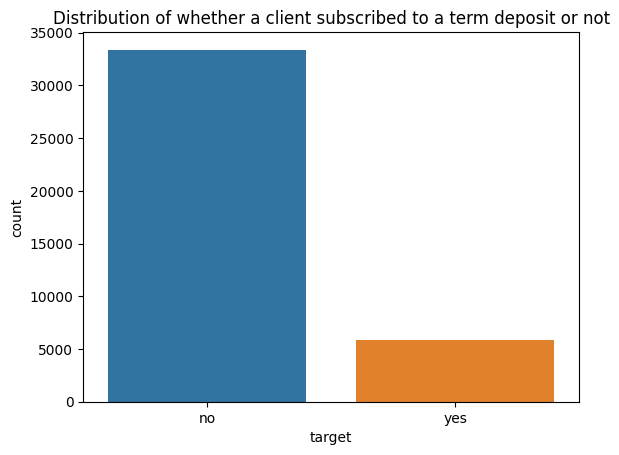

In [621]:
sns.countplot(x='target', data=train_df)
plt.title('Distribution of whether a client subscribed to a term deposit or not')
plt.show()

#### **Plot 2: Visualizing Correlation Heatmap for Numerical Features**


* #### Displays the relationships between numerical variables
* #### Strong positive correlations between balance with duration and previous can be seen.


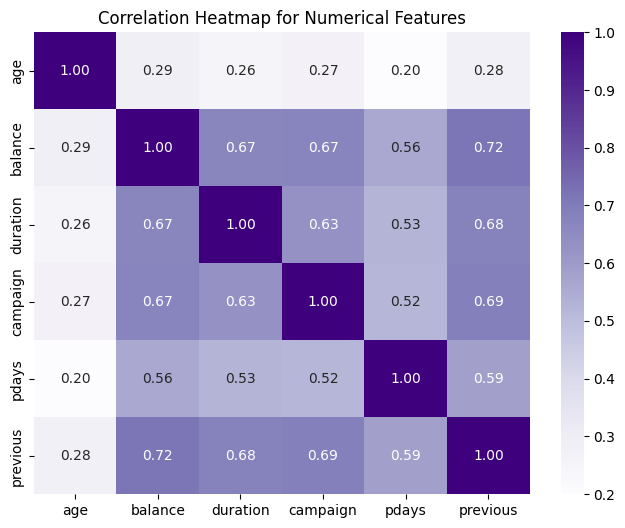

In [622]:
numerical_features = train_df.select_dtypes(include=['int64'])
corr_matrix = numerical_features.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Purples', fmt='.2f')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

### **PREPROCESSING DATA**


#### **Feature Engineering**

In [623]:
# Feature Engineering for 'last contact date'
for df in [train_df, test_df]:
    df['last_contact_day'] = pd.to_datetime(df['last contact date']).dt.day
    df['last_contact_month'] = pd.to_datetime(df['last contact date']).dt.month
    df['last_contact_weekday'] = pd.to_datetime(df['last contact date']).dt.weekday

# Feature Engineering for Interaction balance and duration 
train_df['balance_duration_interaction'] = train_df['balance'] * train_df['duration']
test_df['balance_duration_interaction'] = test_df['balance'] * test_df['duration']

# Feature Engineering for Interaction between balance and previous
train_df['balance_previous_interaction'] = train_df['balance'] * train_df['previous']
test_df['balance_previous_interaction'] = test_df['balance'] * test_df['previous']

# Feature Engineering for Job 
#train_df['job'] = train_df['job'].str.replace("-", "", regex=False)
#test_df['job'] = test_df['job'].str.replace("-", "", regex=False)

In [624]:
# Identify categorical and numerical columns
categorical_cols = ['marital', 'default', 'housing', 'loan', 'poutcome']
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
ordinal_cols = ['education']
lab_cols = ['job']

# Update feature lists
numerical_cols += ['last_contact_day','last_contact_month', 'last_contact_weekday', 'balance_duration_interaction']

In [625]:
# Drop original 'last contact date' column
train_df.drop(columns=['last contact date'], inplace=True)
test_df.drop(columns=['last contact date'], inplace=True)

In [626]:
# Define preprocessing for numeric features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Define preprocessing for ordinal features
education_order = ['primary', 'secondary', 'tertiary']
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1, categories=[education_order]))
])

# Define function to apply LabelEncoder to each column
def label_encode(X):
    le = LabelEncoder()
    # Convert to DataFrame if input is an array
    X_df = pd.DataFrame(X) if isinstance(X, np.ndarray) else X
    return X_df.apply(lambda col: le.fit_transform(col))


label_encoder_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('label_encoder', FunctionTransformer(label_encode, validate=False))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
        ('ord', ordinal_transformer, ordinal_cols),
        ('lab', label_encoder_transformer, lab_cols)
    ])

In [627]:
# Identifying features and target variable
X = train_df.drop('target', axis=1)
y = train_df['target']

# Encoding the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

#Apply SMOTE to handle class imbalance
#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

#ros = RandomOverSampler(random_state=42)
#X_resampled, y_resampled = ros.fit_resample(X, y)

In [628]:
# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)
X_test_preprocessed = preprocessor.transform(test_df)
X_full_preprocessed = preprocessor.fit_transform(X)

### **BASELINE MODEL: DUMMY CLASSIFIER**

In [629]:
# Initialize and train the dummy classifier
# predicts the most frequent class in the training set
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

# Predict on validation set
y_val_pred = dummy_clf.predict(X_val)

# Calculate accuracy and F1 score for validation dataset
dummy_accuracy = accuracy_score(y_val, y_val_pred)
# weighted metric handles class imbalance of data
dummy_f1 = f1_score(y_val, y_val_pred, average='macro')

print(f"Dummy Classifier Accuracy: {dummy_accuracy:.4f}")
print(f"Dummy Classifier F1 Score: {dummy_f1:.4f}")

# Save baseline metrics
baseline_metrics = {'Model': 'Dummy', 'Accuracy': dummy_accuracy, 'F1 Score': dummy_f1}

Dummy Classifier Accuracy: 0.8473
Dummy Classifier F1 Score: 0.4587


### **MODEL TRAINING**

#### **Explanation of model choices:**

* **Logistic Regression:** Simple and effective linear model for binary and multiclass classification.
* **KNN:** Non-parametric model that classifies based on the majority class among k-nearest neighbors.
* **SVM:** Effective in high-dimensional spaces and with various kernel functions; default RBF kernel chosen.
* **Random Forest:** Ensemble method that reduces overfitting by averaging multiple decision trees.
* **Decision Tree:** Simple and interpretable model, but prone to overfitting.
* **XGBoost:** Powerful gradient boosting method, often leading to better performance with default parameters.
* **MLPClassifier:** Flexible and effective model for multiclass classification


In [630]:
# Tests all the models
# Initiating a dictionary for the chosen models
# Default parameters for simplicity
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(),
    'MLPClassifier': MLPClassifier(max_iter=1000),
}

# List to store the results
results = []

for name, model in models.items():
    # Training the model on preprocessed set
    model.fit(X_train_preprocessed, y_train)
    # making predictions on validation set
    y_val_pred = model.predict(X_val_preprocessed)
    accuracy = accuracy_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred, average='macro')
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} F1 Score: {f1:.4f}")
    results.append({'Model': name, 'Accuracy': accuracy, 'F1 Score': f1})

# Add baseline metrics to results
results.append(baseline_metrics)

# Convert results to DataFrame
#results_df = pd.DataFrame(results)
#print(results_df)

Logistic Regression Accuracy: 0.8554
Logistic Regression F1 Score: 0.6240
KNN Accuracy: 0.8522
KNN F1 Score: 0.6354
SVM Accuracy: 0.8566
SVM F1 Score: 0.6458
Random Forest Accuracy: 0.8641
Random Forest F1 Score: 0.6961
Decision Tree Accuracy: 0.8332
Decision Tree F1 Score: 0.6834
XGBoost Accuracy: 0.8646
XGBoost F1 Score: 0.7136
MLPClassifier Accuracy: 0.8608
MLPClassifier F1 Score: 0.7248


In [649]:
# Hyperparameter tuning for Random Forest
# Parameter grid for tuning
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [10, 20],
    'bootstrap': [True, False]
}
# Initializing the model with random state for reproducibility
rf_model = RandomForestClassifier(random_state=42)

# Setting up grid search and fitting the model
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_rf.fit(X_train_preprocessed, y_train)

# getting the best estimator
best_rf = grid_search_rf.best_estimator_

# Predicting on validation set
y_val_pred_rf = best_rf.predict(X_val_preprocessed)

# Calculating scores
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
f1_rf = f1_score(y_val, y_val_pred_rf, average='macro')
print(f"Random Forest (HPT) Accuracy: {accuracy_rf}")
print(f"Random Forest (HPT) F1 Score: {f1_rf}")

# Print the best parameters found by GridSearchCV
print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")

results.append({'Model': 'Random Forest (HPT)', 'Accuracy': accuracy_rf, 'F1 Score': f1_rf})

Random Forest (HPT) Accuracy: 0.863190105826852
Random Forest (HPT) F1 Score: 0.6932039829524937
Best Parameters for Random Forest: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [642]:
# Hyperparameter tuning with GridSearchCV for XGBoost model

# parameter grid for tuning
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [10,  20],
    'learning_rate': [0.01, 0.1, 0.2]
}
# Initializing model with random state for reproducibility
xgb_model = XGBClassifier(random_state=42)

# Setting up gridsearch
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='f1_macro', n_jobs=-1)

# fitting the model on data
grid_search_xgb.fit(X_train_preprocessed, y_train)

# Getting the best estimator found by gridsearch 
best_xgb = grid_search_xgb.best_estimator_

# Predicting on validation set
y_val_pred_xgb = best_xgb.predict(X_val_preprocessed)

# Calculating accuracy and f1_scores
accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb)
f1_xgb = f1_score(y_val, y_val_pred_xgb, average='macro')
print(f"XGBoost (HPT) Accuracy: {accuracy_xgb}")
print(f"XGBoost (HPT) F1 Score: {f1_xgb}")

# Print the best parameters found by GridSearchCV
print(f"Best Parameters for XGBoost model: {grid_search_xgb.best_params_}")

results.append({'Model': 'XGBoost (HPT)', 'Accuracy': accuracy_xgb, 'F1 Score': f1_xgb})

XGBoost (HPT) Accuracy: 0.8668876705342343
XGBoost (HPT) F1 Score: 0.7186454725383474
Best Parameters for XGBoost model: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}


In [643]:
# Two-step hyperparameter tuning for XGBoost

# Step 1: Tune learning rate
param_grid_lr = {
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search_lr = GridSearchCV(estimator=xgb_model, param_grid=param_grid_lr, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_lr.fit(X_train_preprocessed, y_train)
best_learning_rate = grid_search_lr.best_params_['learning_rate']

# Step 2: Tune other parameters using the best learning rate
param_grid_rest = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'learning_rate': [best_learning_rate]
}
grid_search_xgb_2step = GridSearchCV(estimator=xgb_model, param_grid=param_grid_rest, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_xgb_2step.fit(X_train_preprocessed, y_train)
best_xgb_2step = grid_search_xgb_2step.best_estimator_
y_val_pred_xgb_2step = best_xgb_2step.predict(X_val_preprocessed)
accuracy_xgb_2step = accuracy_score(y_val, y_val_pred_xgb_2step)
f1_xgb_2step = f1_score(y_val, y_val_pred_xgb_2step, average='macro')
print(f"XGBoost (2-Step HPT) Accuracy: {accuracy_xgb_2step}")
print(f"XGBoost (2-Step HPT) F1 Score: {f1_xgb_2step}")

# Print the best parameters found by GridSearchCV
print(f"Best Parameters for XGBoost 2-step model: {grid_search_xgb_2step.best_params_}")

results.append({'Model': 'XGBoost (2-Step HPT)', 'Accuracy': accuracy_xgb_2step, 'F1 Score': f1_xgb_2step})

XGBoost (2-Step HPT) Accuracy: 0.8673976794593905
XGBoost (2-Step HPT) F1 Score: 0.7212484016599497
Best Parameters for XGBoost 2-step model: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100}


In [641]:
# Hyperparameter tuning with RandomizedSearchCV for XGBoost to avoid overfitting

# Calculate class weights for the dataset (where target is 'target' column)
class_weights = compute_class_weight(class_weight='balanced', 
                                     classes=np.unique(y_train), 
                                     y=y_train)

# Scale positive weight for binary classification (minority class weight)
manual_scale_pos_weight = 2

param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [1, 3, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [3, 5, 7],
    'scale_pos_weight': [manual_scale_pos_weight]
}

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# RandomizedSearchCV for hyperparameter tuning
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist_xgb, n_iter=50, cv=5, scoring='f1_macro', n_jobs=-1, random_state=42, verbose=1)

# Fit the RandomizedSearchCV object to the preprocessed training data
random_search_xgb.fit(X_train_preprocessed, y_train)

# Get the best estimator from RandomizedSearchCV
best_xgb_random = random_search_xgb.best_estimator_

# Predict on the validation set using the best model
y_val_pred_xgb_random = best_xgb_random.predict(X_val_preprocessed)

# Calculate the accuracy and F1 score for the best model
accuracy_xgb_random = accuracy_score(y_val, y_val_pred_xgb_random)
f1_xgb_random = f1_score(y_val, y_val_pred_xgb_random, average='macro')

print(f"XGBoost (RandomizedSearchCV) Accuracy: {accuracy_xgb_random}")
print(f"XGBoost (RandomizedSearchCV) F1 Score: {f1_xgb_random}")

# Print the best hyperparameters found
print(f"Best Parameters for XGBoost (RandomizedSearchCV): {random_search_xgb.best_params_}")

results.append({'Model': 'XGBoost (RandomizedSearchCV)', 'Accuracy': accuracy_xgb_random, 'F1 Score': f1_xgb_random})

Fitting 5 folds for each of 50 candidates, totalling 250 fits
XGBoost (RandomizedSearchCV) Accuracy: 0.8682901950784139
XGBoost (RandomizedSearchCV) F1 Score: 0.7742521936854683
Best Parameters for XGBoost (RandomizedSearchCV): {'subsample': 0.8, 'scale_pos_weight': 2, 'n_estimators': 200, 'min_child_weight': 7, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 1.0}


In [644]:
# Hyperparameter tuning for MLPClassifier
# Parameter grid for tuning
param_grid_mlpc = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive'],
}

# Initializing the model with random state for reproducibility
mlpc_model = MLPClassifier(max_iter=10000, random_state=42, early_stopping=True)

# Setting up grid search and fitting the model
grid_search_mlpc = GridSearchCV(estimator=mlpc_model, param_grid=param_grid_mlpc, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_mlpc.fit(X_train_preprocessed, y_train)

# getting the best estimator
best_mlpc = grid_search_mlpc.best_estimator_

# Predicting on validation set
y_val_pred_mlpc = best_mlpc.predict(X_val_preprocessed)

# Calculating scores
accuracy_mlpc = accuracy_score(y_val, y_val_pred_mlpc)
f1_mlpc = f1_score(y_val, y_val_pred_mlpc, average='macro')
print(f"MLPClassifier (HPT) Accuracy: {accuracy_mlpc}")
print(f"MLPClassifier (HPT) F1 Score: {f1_mlpc}")

# Print the best parameters found by GridSearchCV
print(f"Best Parameters for MLPClassifier (HPT): {grid_search_mlpc.best_params_}")

results.append({'Model': 'MLPClassifier (HPT)', 'Accuracy': accuracy_mlpc, 'F1 Score': f1_mlpc})

MLPClassifier (HPT) Accuracy: 0.8643376259084534
MLPClassifier (HPT) F1 Score: 0.7007288129125806
Best Parameters for MLPClassifier (HPT): {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}


### **MODEL COMPARISON PLOTS**


#### **Accuracy plot**

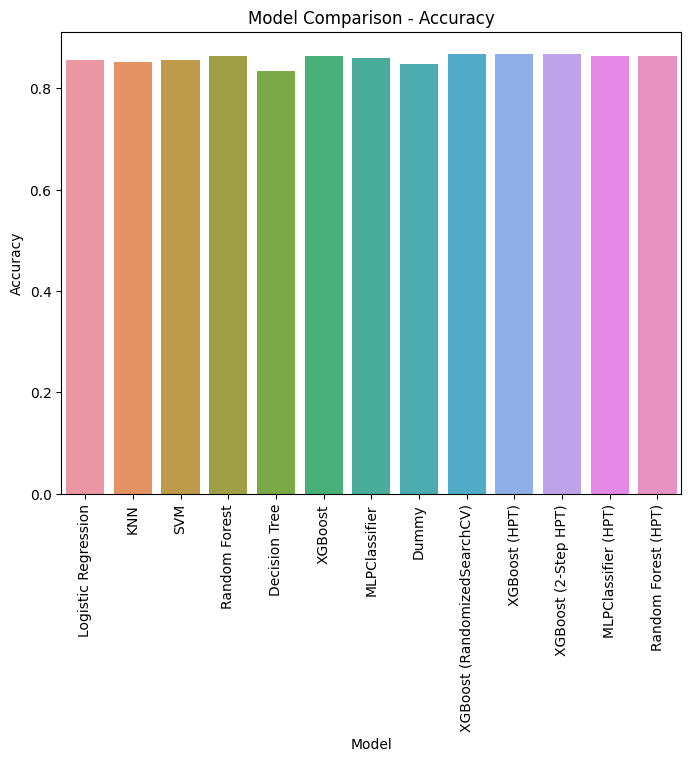

In [664]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plot the results
# Accuracy score plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Comparison - Accuracy')
plt.xticks(rotation=90)
plt.show()

#### **F1-score plot**

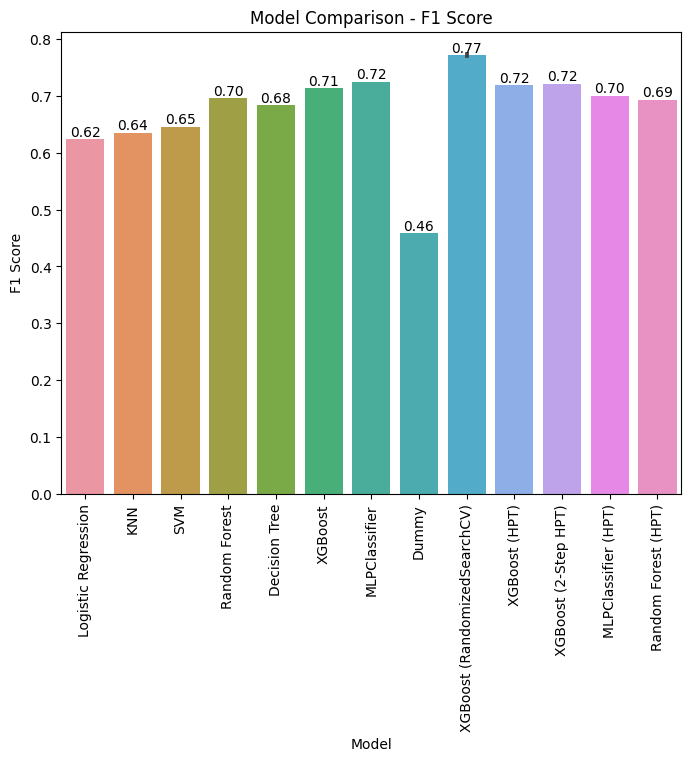

In [665]:
# F1-score plot
plt.figure(figsize=(8, 6))
bp= sns.barplot(x='Model', y='F1 Score', data=results_df)

for p in bp.patches:
    height = p.get_height()  
    bp.annotate(f'{height:.2f}',  
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)  

#bp.bar_label(bp.containers[0], fontsize=8)
plt.title('Model Comparison - F1 Score')
plt.xticks(rotation=90)
plt.show()

In [666]:
# Train the best model on the full dataset
best_model = XGBClassifier()  # XGBoost performed best
best_model.fit(X_full_preprocessed, y_encoded)

# Make predictions on the test set
y_test_pred = best_model.predict(X_test_preprocessed)

# Generate new sample submission dataframe
def listp(L):
    I=[]
    for i in L:
        if i==0:
            I.append("no")
        else:
            I.append("yes")
    return I
    
y_pred=listp(y_test_pred)
submission=pd.DataFrame({'id':range(0,len(y_pred)),'target':y_pred})

#submission = pd.DataFrame({
#    'id': range(1, len(y_test_pred) + 1),
#    'target': le.inverse_transform(y_test_pred)
#})

# Save the submission file
submission.to_csv('submission.csv', index=False)

In [667]:
# Save Model for Future Use
joblib.dump(best_model, 'bank_marketing_model.pkl')

['bank_marketing_model.pkl']